In [221]:
import tensorflow as tf

from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import PIL
import os
import re #regex
import numpy as np
import random

### Converting images to numpy array

img_dict = {}
directory ='skulls/'

for filename in os.listdir(directory):
    if filename.endswith(".jpg"): 
        img = PIL.Image.open(directory+filename)
        img_sequence = img.getdata()
        img_array = np.array(img_sequence) 
        img_array = img_array/255 #normalize
        #print(img_array.shape)
        key = re.sub(r'\.[^.]*$',"",filename)
        img_dict[key] = img_array #saving np array to a dictionary

In [222]:
directory ='skulls/'
size = (255,255)

X=[]
Y=[]

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img = PIL.Image.open(directory+filename)
        img = img.convert("RGB")
        img = img.resize(size)
        data = np.array(img).astype('float32')/255
        X.append(data)
        label = re.sub(r'\.[^.]*$',"",filename) #removing file extension
        Y.append(label)
        
X = np.array(X)
Y = np.array(Y)
OneHot_labels = np.array([i for i in range(0,73)])
print(X.shape)
print(Y.shape)

(73, 255, 255, 3)
(73,)


In [223]:
OneHot_labels

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
       34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50,
       51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67,
       68, 69, 70, 71, 72])

In [224]:
Y

array(['Angolan Colobus Monkey_Colobus angolensis',
       'Australopithecus boisei',
       'Aye-Aye          Daubentonia madagascarensis',
       'Bearded Saki female_Chiropotes satanas satanas',
       'Bearded Saki male_Chiropotes satanas satanas',
       'Blue Monkey_Cercopitheous mitis', 'BonoboPygmy Chimpanzee female',
       'Borneo Orangutan', 'Common Chimpanzee juvenile',
       'Common Chimpanzee male', 'Common Chimpanzee male2',
       'Common Marmoset_Callithrix jacchus',
       'Common Squirrel Monkey female_Saimiri sciurea sciurea',
       'Common Squirrel Monkey male_Saimiri sciurea sciurea',
       'Crab- eating Monkey_Maccaca facicularis',
       'De Brazza monkey female_Cercopithecus neglectus',
       "De Brazza's monkey juvenile male_Cercopithecus neglectus",
       "Demidoff's Bush Baby (male)          Galagoides demidoff",
       'Diana Monkey female_Cercopitheous diana',
       'GalagoBush Baby          Galagos senegalensis',
       'Gelada Baboon male', 'Gibbon

### Setting up CNN

In [225]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(255, 255, 3)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(73)) #73 classes

model.summary()

Model: "sequential_20"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_54 (Conv2D)           (None, 253, 253, 32)      896       
_________________________________________________________________
max_pooling2d_36 (MaxPooling (None, 126, 126, 32)      0         
_________________________________________________________________
conv2d_55 (Conv2D)           (None, 124, 124, 64)      18496     
_________________________________________________________________
max_pooling2d_37 (MaxPooling (None, 62, 62, 64)        0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 60, 60, 64)        36928     
_________________________________________________________________
flatten_15 (Flatten)         (None, 230400)            0         
_________________________________________________________________
dense_30 (Dense)             (None, 64)              

In [226]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

history = model.fit(X, OneHot_labels, epochs=10)

Epoch 1/10
3/3 [==============================] - 2s 754ms/step - loss: 6.7736 - accuracy: 0.0137
Epoch 2/10
3/3 [==============================] - 2s 735ms/step - loss: 4.3530 - accuracy: 0.0274
Epoch 3/10
3/3 [==============================] - 2s 763ms/step - loss: 4.2281 - accuracy: 0.0822
Epoch 4/10
3/3 [==============================] - 2s 763ms/step - loss: 4.1507 - accuracy: 0.0685
Epoch 5/10
3/3 [==============================] - 2s 730ms/step - loss: 3.8967 - accuracy: 0.1507
Epoch 6/10
3/3 [==============================] - 2s 728ms/step - loss: 3.5403 - accuracy: 0.1781
Epoch 7/10
3/3 [==============================] - 2s 728ms/step - loss: 3.1129 - accuracy: 0.3425
Epoch 8/10
3/3 [==============================] - 2s 766ms/step - loss: 2.3917 - accuracy: 0.5890
Epoch 9/10
3/3 [==============================] - 2s 740ms/step - loss: 1.5306 - accuracy: 0.7123
Epoch 10/10
3/3 [==============================] - 2s 733ms/step - loss: 0.8848 - accuracy: 0.8082


### Trying to avoid overfit

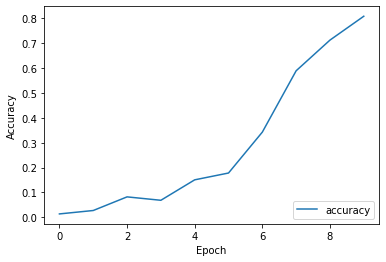

In [227]:
plt.plot(history.history['accuracy'], label='accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(loc='lower right')

### Testset

In [228]:
directory ='skulls_testset/'
size = (255,255)

X=[]
Y=[]

for filename in os.listdir(directory):
    if filename.endswith(".jpg"):
        img = PIL.Image.open(directory+filename)
        img = img.convert("RGB")
        img = img.resize(size)
        data = np.array(img).astype('float32')/255
        X.append(data)
        label = re.sub(r'\.[^.]*$',"",filename) #removing file extension
        Y.append(label)
        
test_val = np.array(X)
test_label = np.array(Y)
testOneHot_labels = np.array([i for i in range(0,len(Y))])
print(test_val.shape)
print(test_labels.shape)

(11, 255, 255, 3)
(13,)


In [229]:
test_label

array(['Angolan Colobus Monkey_Colobus angolensis',
       'Australopithecus boisei',
       'Aye-Aye          Daubentonia madagascarensis',
       'Bearded Saki female_Chiropotes satanas satanas',
       'Blue Monkey_Cercopitheous mitis', 'Borneo Orangutan',
       'Common Chimpanzee male', 'Common Marmoset_Callithrix jacchus',
       'Common Squirrel Monkey female_Saimiri sciurea sciurea',
       'Common Squirrel Monkey male_Saimiri sciurea sciurea',
       'Maccaca facicularis'], dtype='<U53')

In [230]:
test_loss, test_acc = model.evaluate(test_val,  testOneHot_labels, verbose=2)


1/1 - 0s - loss: 4.6403 - accuracy: 0.0909


### very low accuracy